#### This code demonstrates the implementation of Multiclass Classification using Neural Network approach

###### The 5-Step Model Life-Cycle


A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the tf.keras API.

The five steps in the life-cycle are as follows:

1. Define the model.
2. Compile the model.
3. Fit the model.
4. Evaluate the model.
5. Make predictions.

##### Reference :https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [3]:
#importing the relevant libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [6]:
#loading the dataset 
irisData = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv',header=None)

In [7]:
irisData.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#total no. of classes and their frequency in the dataset
irisData[4].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

In [11]:
#declaring the input and output columns
X = irisData.values[:,:-1]
y = irisData.values[:,-1]

In [12]:
#converting the output variable from string into integer
y = LabelEncoder().fit_transform(y)

In [17]:
#splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("****** Dimensions of train and test dataset ******\n X-train : {}\n X-test : {}\n y-train : {}\n y-test : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

****** Dimensions of train and test dataset ******
 X-train : (100, 4)
 X-test : (50, 4)
 y-train : (100,)
 y-test : (50,)


In [18]:
#determining the input features 
inputFeatures = X_train.shape[1]

In [26]:
#defining the model structure
model = Sequential()

#input layer and first hi(dden layer
model.add(Dense(X_train.shape[1],activation='relu',kernel_initializer='he_normal',input_shape=(inputFeatures,)))

#second layer
model.add(Dense(8,activation='relu',kernel_initializer='he_normal'))

#output layer
model.add(Dense(3,activation='softmax'))

#summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [28]:
#compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
#fitting the model
Model = model.fit(X_train,y_train,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
100/100 [==============================] - 0s 2ms/sample - loss: 3.1126 - accuracy: 0.3000
Epoch 2/150
100/100 [==============================] - 0s 113us/sample - loss: 2.9420 - accuracy: 0.3000
Epoch 3/150
100/100 [==============================] - 0s 101us/sample - loss: 2.7795 - accuracy: 0.3000
Epoch 4/150
100/100 [==============================] - 0s 130us/sample - loss: 2.6296 - accuracy: 0.3000
Epoch 5/150
100/100 [==============================] - 0s 93us/sample - loss: 2.4990 - accuracy: 0.3000
Epoch 6/150
100/100 [==============================] - 0s 129us/sample - loss: 2.3787 - accuracy: 0.3000
Epoch 7/150
100/100 [==============================] - 0s 102us/sample - loss: 2.2622 - accuracy: 0.3000
Epoch 8/150
100/100 [==============================] - 0s 110us/sample - loss: 2.1579 - accuracy: 0.3100
Epoch 9/150
100/100 [==============================] - 0s 107us/sample - loss: 2.0680 - accuracy: 0.3100
Epoch 10/150
100/100 [==============================] - 0s

100/100 [==============================] - 0s 124us/sample - loss: 0.6614 - accuracy: 0.8500
Epoch 79/150
100/100 [==============================] - 0s 90us/sample - loss: 0.6569 - accuracy: 0.8500
Epoch 80/150
100/100 [==============================] - 0s 115us/sample - loss: 0.6529 - accuracy: 0.8700
Epoch 81/150
100/100 [==============================] - 0s 109us/sample - loss: 0.6479 - accuracy: 0.8900
Epoch 82/150
100/100 [==============================] - 0s 115us/sample - loss: 0.6425 - accuracy: 0.8900
Epoch 83/150
100/100 [==============================] - 0s 116us/sample - loss: 0.6372 - accuracy: 0.9000
Epoch 84/150
100/100 [==============================] - 0s 113us/sample - loss: 0.6318 - accuracy: 0.9000
Epoch 85/150
100/100 [==============================] - 0s 100us/sample - loss: 0.6272 - accuracy: 0.9000
Epoch 86/150
100/100 [==============================] - 0s 105us/sample - loss: 0.6209 - accuracy: 0.9000
Epoch 87/150
100/100 [==============================] - 0s 8

In [30]:
#showing the model parameters 
Model.params

{'batch_size': 32,
 'epochs': 150,
 'steps': None,
 'samples': 100,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'accuracy']}

In [33]:
#evaluating the model
loss,accuracy = model.evaluate(X_test,y_test,verbose=0)
print("Test accuracy :",accuracy)

Test accuracy : 0.98


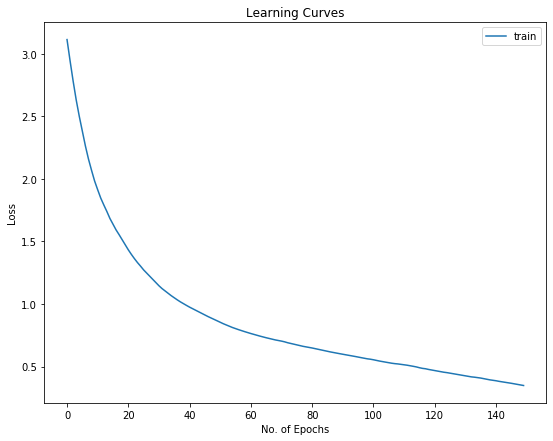

In [39]:
#displaying the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.plot(Model.history['loss'],label='train')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [44]:
#making predictions
data = np.array([5.1,3.5,1.4,0.2]).reshape(1,-1)
prediction = model.predict(data)
print("Prediction :",prediction,"\nPredicted Class:",np.argmax(prediction))

Prediction : [[0.7243624  0.16102645 0.11461113]] 
Predicted Class: 0
